In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [3]:
patient_aff_i = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv', index_col=0)
patient_aff_ii = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv', index_col=0)
patient_mut = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv', index_col=0)

In [54]:
random_aff_ii = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/random.all.csv', index_col=0)

For strongly recurrent mutations, how do class-i and class-ii presentation vary relatively to each other? <br>
If one is up, is the other down? Does evolution only require one to not present? 

In [59]:
high_mutations = list(patient_mut.sum()[patient_mut.sum()>40].index)
med_mutations = list(patient_mut.sum()[(patient_mut.sum()>20)&(patient_mut.sum()<=40)].index)
low_mutations = list(patient_mut.sum()[(patient_mut.sum()>8)&(patient_mut.sum()<=20)].index)
vlow_mutations = list(patient_mut.sum()[(patient_mut.sum()<5)].index)

(0, 10)

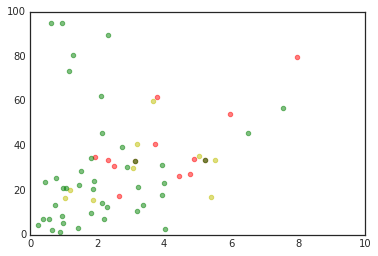

In [37]:
plt.scatter(patient_aff_i[high_mutations].median(), patient_aff_ii[high_mutations].median(), alpha=0.5, color='r')
plt.scatter(patient_aff_i[med_mutations].median(), patient_aff_ii[med_mutations].median(), alpha=0.5, color='y')
plt.scatter(patient_aff_i[low_mutations].median(), patient_aff_ii[low_mutations].median(), alpha=0.5, color='g')
plt.ylim(0, 100)
plt.xlim(0, 10)

In [24]:
patient_aff_i[high_mutations].median()

BRAF_V600E       5.970144
IDH1_R132H       4.431182
PIK3CA_E545K     4.761852
PIK3CA_H1047R    2.650307
KRAS_G12D        5.218810
KRAS_G12V        2.485953
PIK3CA_E542K     2.305651
NRAS_Q61R        3.138232
KRAS_G12C        3.727403
TP53_R175H       4.888154
TP53_R273C       3.783370
TP53_R248Q       1.945400
TP53_R282W       7.963927
dtype: float64

In [25]:
patient_aff_ii[high_mutations].median()

BRAF_V600E       53.944954
IDH1_R132H       26.526316
PIK3CA_E545K     27.060606
PIK3CA_H1047R    17.600000
KRAS_G12D        33.432836
KRAS_G12V        30.870968
PIK3CA_E542K     33.735294
NRAS_Q61R        33.171429
KRAS_G12C        40.459770
TP53_R175H       33.913043
TP53_R273C       61.600000
TP53_R248Q       34.929577
TP53_R282W       79.687500
dtype: float64

Look at individuals

In [46]:
patients_w_braf = list(patient_mut[patient_mut['BRAF_V600E'] == 1].index)
patients_wo_braf = list(patient_mut[patient_mut['BRAF_V600E'] == 0].index)

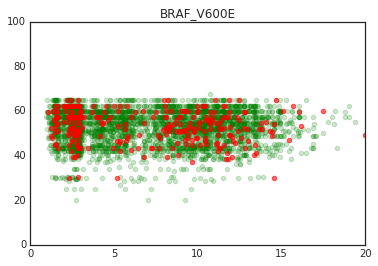

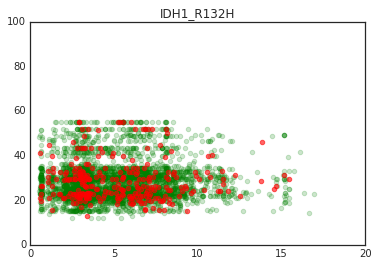

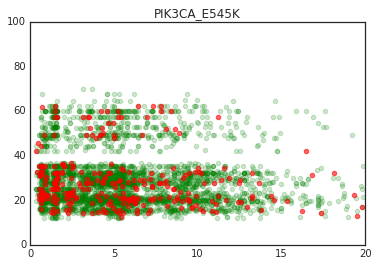

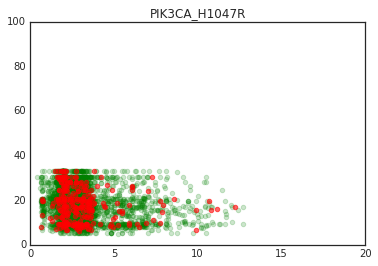

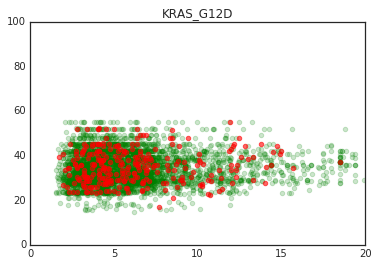

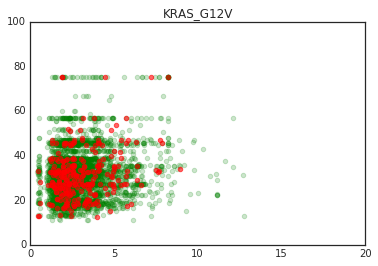

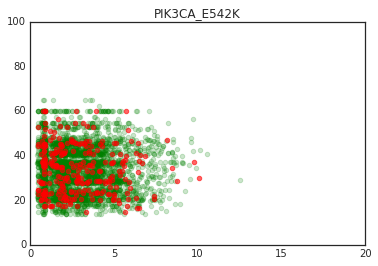

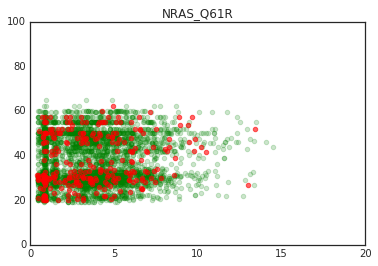

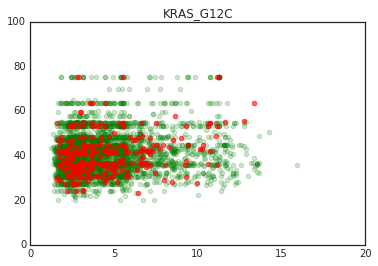

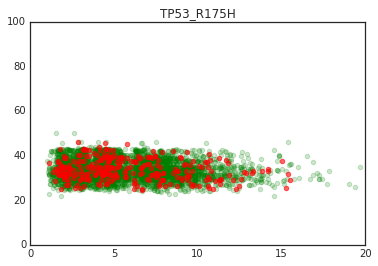

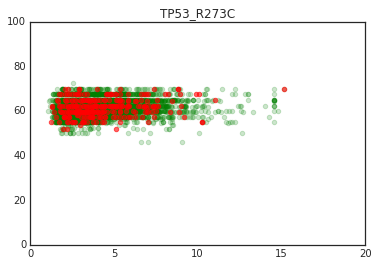

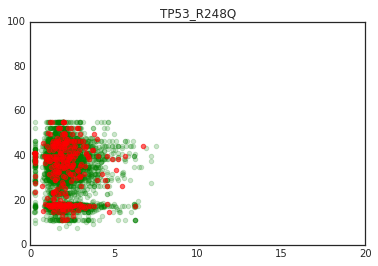

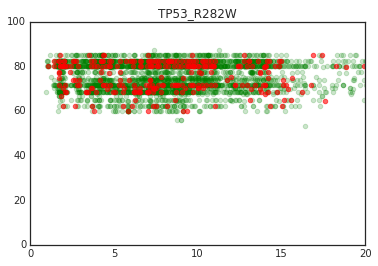

In [58]:
for mutation in high_mutations:
    plt.scatter(patient_aff_i.ix[patients_wo_braf, mutation], patient_aff_ii.ix[patients_wo_braf, mutation], alpha=0.2, color='g')
    plt.scatter(patient_aff_i.ix[patients_w_braf, mutation], patient_aff_ii.ix[patients_w_braf, mutation], alpha=0.6, color='r')
    plt.ylim(0, 100)
    plt.xlim(0, 20)
    plt.title(mutation)
    plt.show()
    plt.clf()

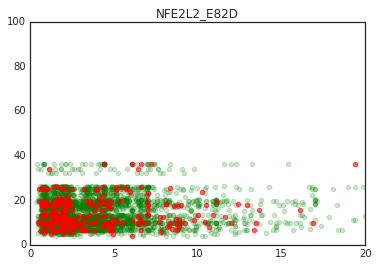

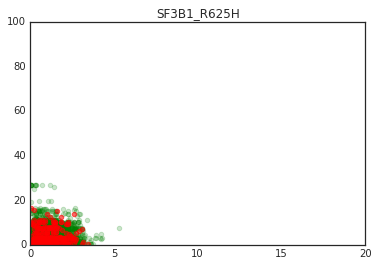

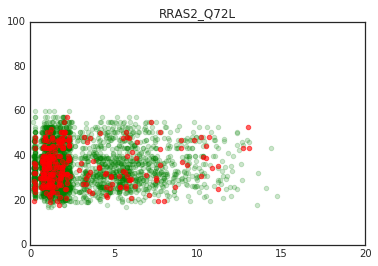

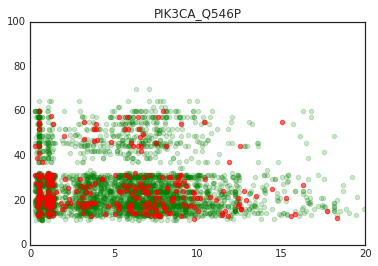

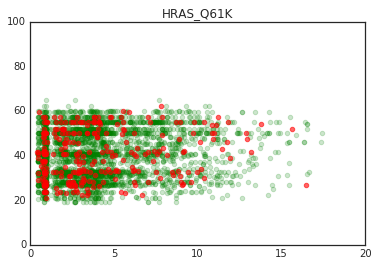

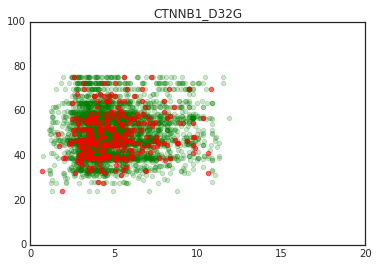

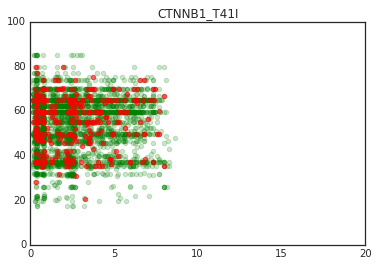

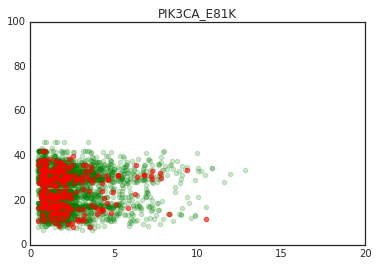

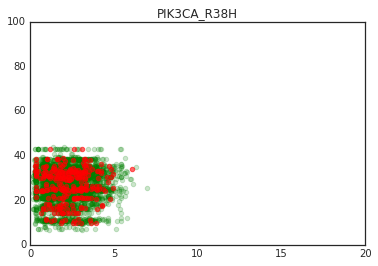

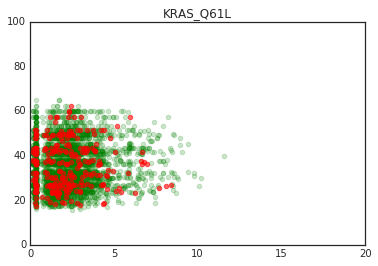

In [61]:
for mutation in vlow_mutations[10:20]:
    plt.scatter(patient_aff_i.ix[patients_wo_braf, mutation], patient_aff_ii.ix[patients_wo_braf, mutation], alpha=0.2, color='g')
    plt.scatter(patient_aff_i.ix[patients_w_braf, mutation], patient_aff_ii.ix[patients_w_braf, mutation], alpha=0.6, color='r')
    plt.ylim(0, 100)
    plt.xlim(0, 20)
    plt.title(mutation)
    plt.show()
    plt.clf()

In [57]:
random_aff_ii.min(axis=1)

mutation
CD177_W33S         13.647388
TSPAN10_S21F       17.533207
PNLIPRP2_P46A       2.067692
SERPINB11_A131G    14.107218
PKD1L2_P1059S       8.248558
PKD1L2_S557I        6.258832
COL26A1_G71C       22.991597
KIR2DS4_H37P        0.029931
IGHG1_K16E          1.769991
IGHG1_Y32S          5.071621
LIPI_N396S          4.967486
SAMSN1_I69V         6.811634
NRIP1_N967K        55.387435
NRIP1_Y279C         3.504716
NRIP1_I877L         0.595193
NRIP1_T19S          0.384615
NRIP1_S33P          2.227603
RMDN3_S225I         0.029992
CYFIP1_C245S        1.741935
CYFIP1_Y387F        1.211901
WFDC11_S84G        40.485683
TMPRSS15_N364D      1.277338
TMPRSS15_P416A      5.953743
BLM_K484N           4.331758
BLM_Y764F           3.187573
BLM_H572Y           1.719030
BLM_D333H          16.564458
EBF4_S454T         18.208984
RAB8B_M82R          0.059794
RAB8B_N157H         2.218009
                     ...    
ZZZ3_N408I         32.374831
TEFM_V118A          1.905637
TEFM_N117K          3.666667
TEFM_